# لينا محمد الجودي 

## House price EDA and LinearRegression prediction

In [179]:
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn import linear_model
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
%matplotlib inline
color = sns.color_palette()


In [61]:
data=pd.read_csv("/Users/lina.mac/Desktop/data-course/Real estate.csv")

# Display the first 20 rows of data

In [62]:
data.head(20)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1


# Display the last 20 rows of data

In [63]:
data.tail(20)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
394,395,2013.500,32.6,4136.27100,1,24.95544,121.49630,24.7
395,396,2012.917,21.2,512.54870,4,24.97400,121.53842,42.5
396,397,2012.667,37.1,918.63570,1,24.97198,121.55063,31.9
397,398,2013.417,13.1,1164.83800,4,24.99156,121.53406,32.2
398,399,2013.417,14.7,1717.19300,2,24.96447,121.51649,23.0
399,400,2012.917,12.7,170.12890,1,24.97371,121.52984,37.3
400,401,2013.250,26.8,482.75810,5,24.97433,121.53863,35.5
401,402,2013.083,7.6,2175.03000,3,24.96305,121.51254,27.7
402,403,2012.833,12.7,187.48230,1,24.97388,121.52981,28.5
403,404,2012.667,30.9,161.94200,9,24.98353,121.53966,39.7


# Display data informations

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


### we can see that there is no missing data or null data and also the data has only numerical data type

In [65]:
data.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


## from the command above we can see the basic statistics for each column in the data

In [66]:
check_duplicate = data.duplicated().any()
check_duplicate

False

In [67]:
check_Nan = data.isnull().values.any()
check_Nan

False

In [68]:
data=data.drop(['No'],axis=1)

# correlation between data columns

<AxesSubplot: >

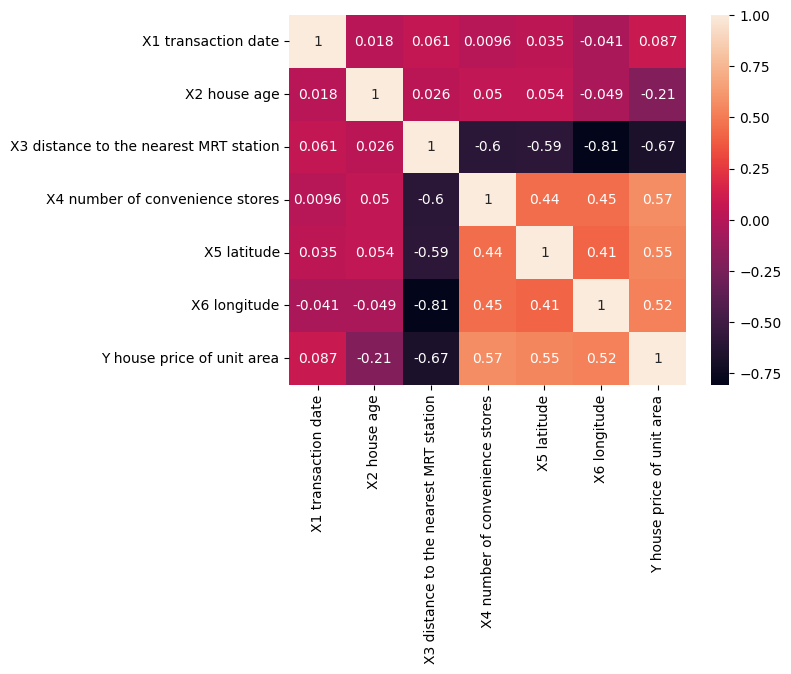

In [69]:
sns.heatmap(data.corr(),annot=True)

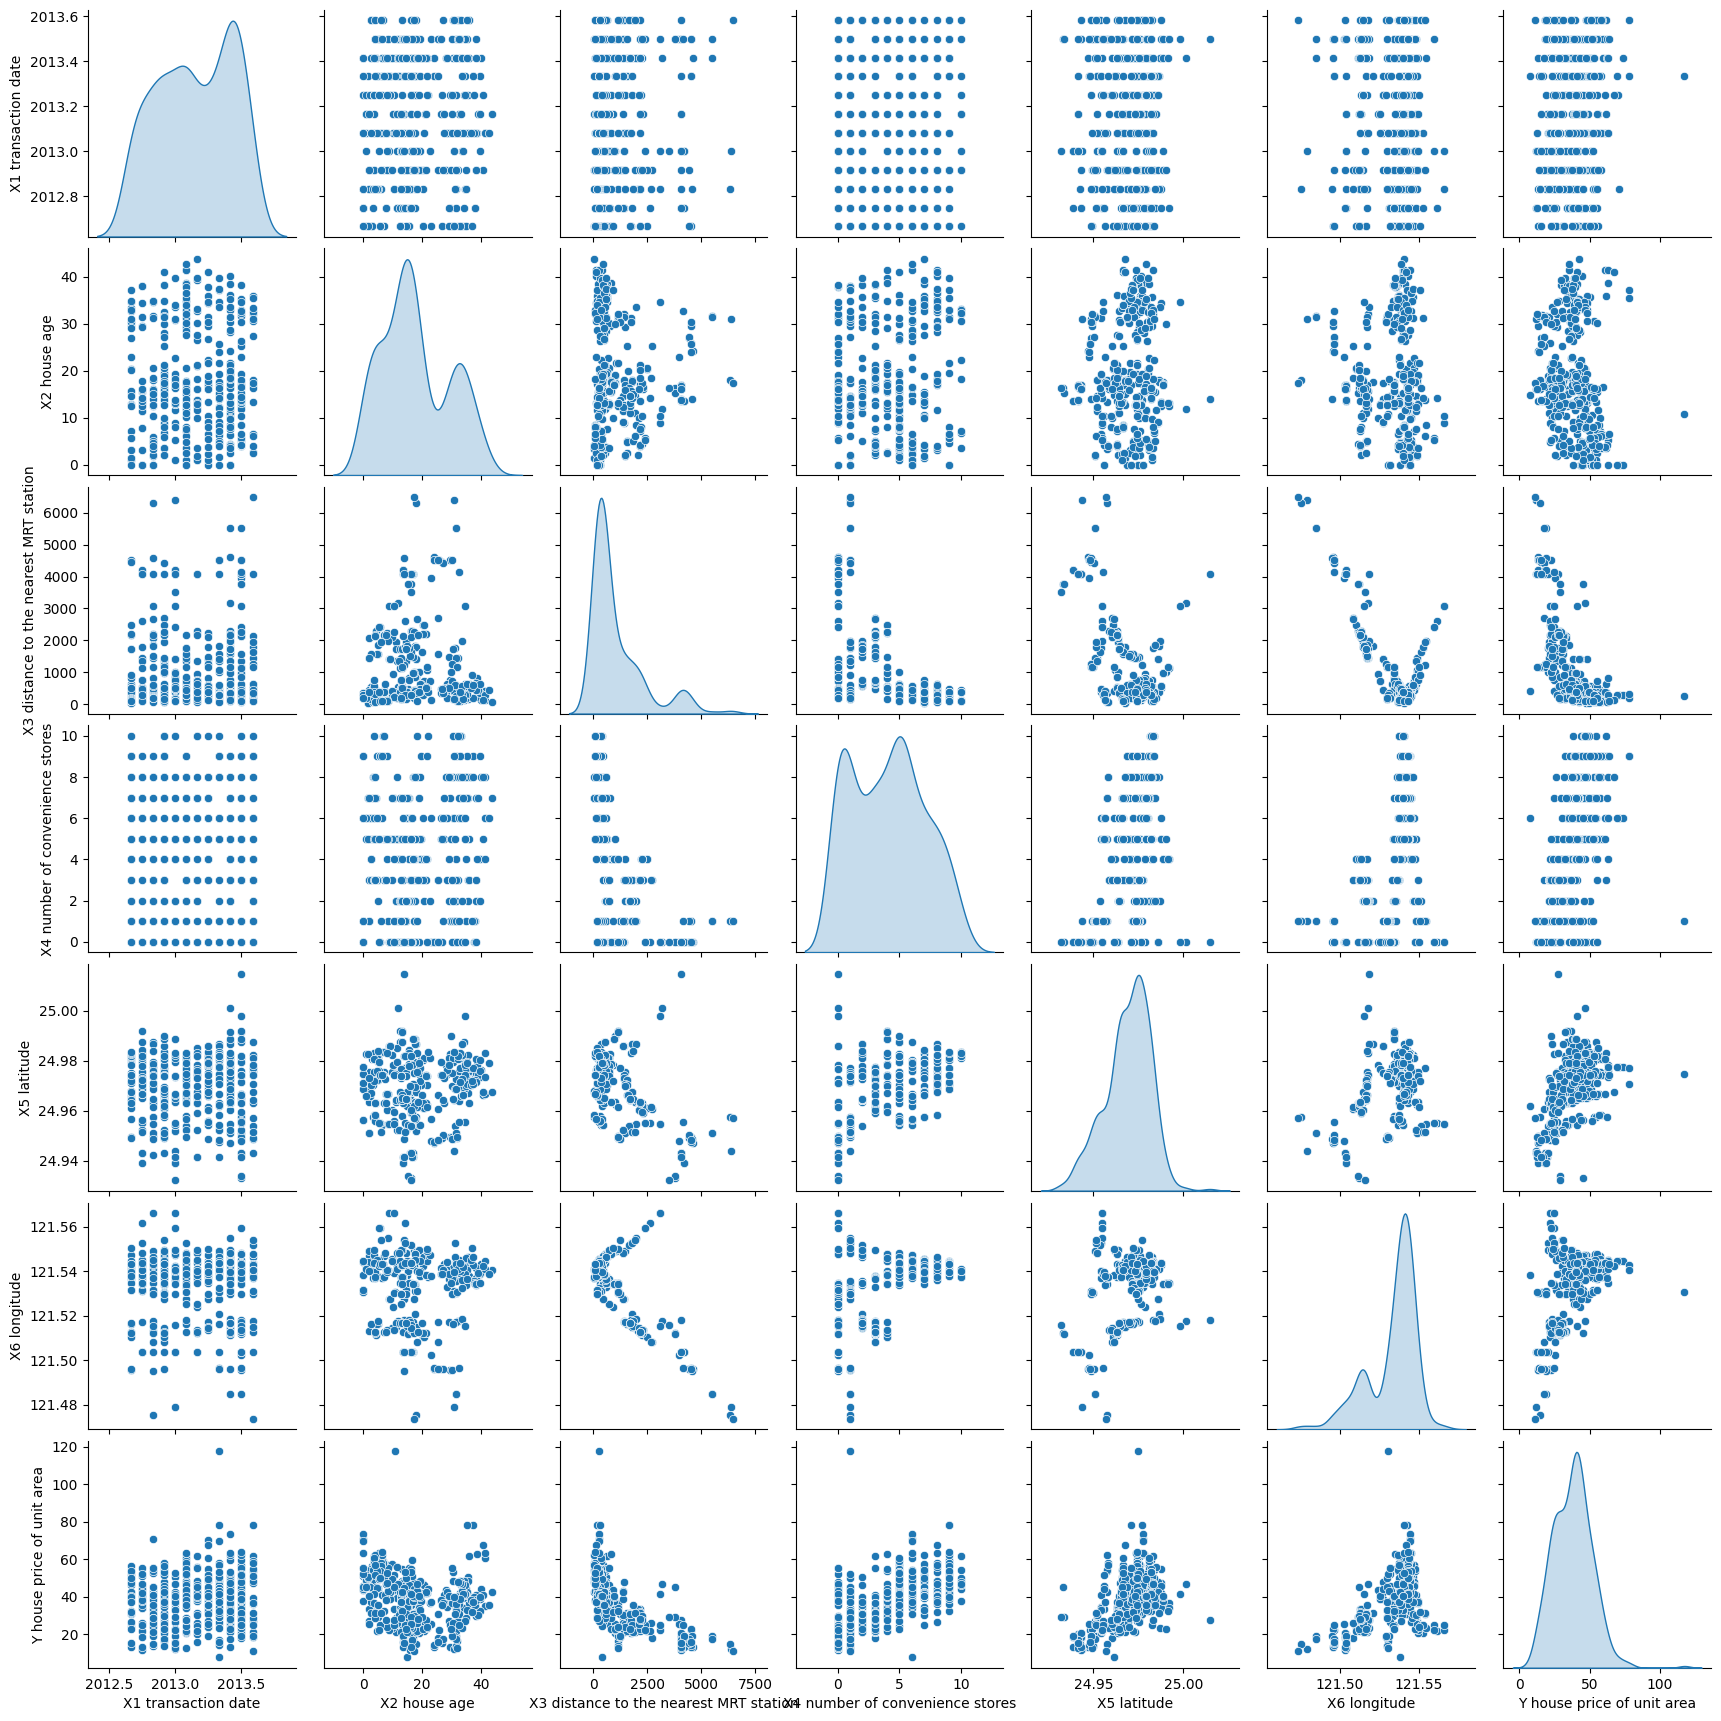

In [73]:
sns.pairplot(data,diag_kind='kde')


### from the pairplot we can see the corelation between each two columns, the diagonal has a normal distribution between the column and the column itself

#### what is the average of the house age?

In [77]:
data['X2 house age'].mean()

17.71256038647343

#### which house has the highest price? 

In [82]:
data[data['Y house price of unit area']==data['Y house price of unit area'].max()]

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
270,2013.333,10.8,252.5822,1,24.9746,121.53046,117.5


#### which house has the lowest price?

In [96]:
t=data[data['Y house price of unit area']==data['Y house price of unit area'].min()]
t

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
113,2013.333,14.8,393.2606,6,24.96172,121.53812,7.6


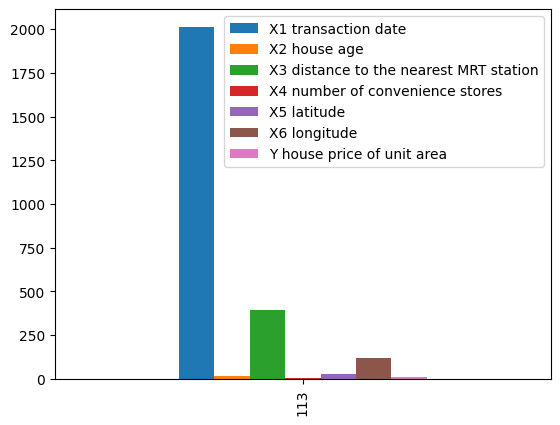

In [97]:
t.plot.bar();

#### what is the price of the oldest house? 

In [94]:
x=data[data['X2 house age']==data['X2 house age'].max()]['Y house price of unit area']
x

192    42.7
Name: Y house price of unit area, dtype: float64

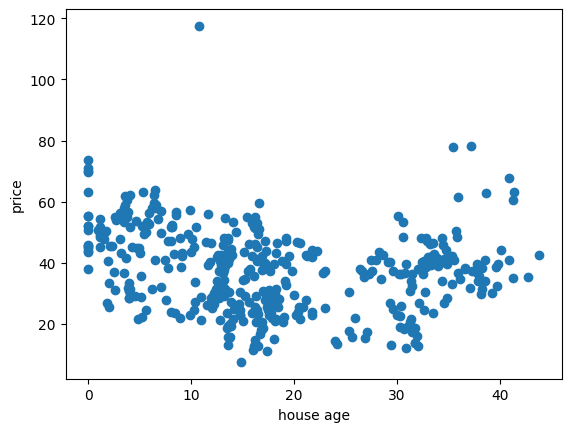

<Figure size 1500x2000 with 0 Axes>

In [138]:
plt.scatter(data['X2 house age'], data['Y house price of unit area'])
plt.xlabel("house age")
plt.ylabel("price")
plt.figure(figsize=(15, 20))
plt.show()

#### How many unique years are there? 

In [120]:
data['X1 transaction date'].nunique()

12

#### what is the average of all houses prices per transaction year?

In [114]:
x=data.groupby('X1 transaction date').mean()['Y house price of unit area']
x

X1 transaction date
2012.667    38.543333
2012.750    35.581481
2012.833    35.683871
2012.917    35.557895
2013.000    31.057143
2013.083    40.493478
2013.167    38.304000
2013.250    41.293750
2013.333    41.562069
2013.417    38.453448
2013.500    38.119149
2013.583    39.604348
Name: Y house price of unit area, dtype: float64

Text(0, 0.5, 'price')

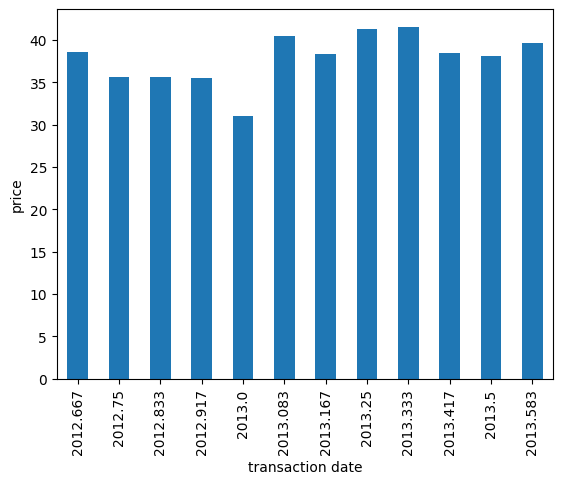

In [118]:
x.plot.bar();
plt.xlabel("transaction date")
plt.ylabel("price")

#### we can notice that 2013 is the most year that the house prices have gone up

In [ ]:
distance to the nearest MRT station

### what is the nearest house to the MRT station? 

In [122]:
v=data[data['X3 distance to the nearest MRT station']==data['X3 distance to the nearest MRT station'].min()]
v

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
19,2012.667,1.5,23.38284,7,24.96772,121.54102,47.7
275,2012.667,1.5,23.38284,7,24.96772,121.54102,49.7


### We can see that two houses have the same distance to the MRT station

#### what is the price of the nearest house to the MRT station?

In [131]:
f=data[data['X3 distance to the nearest MRT station']==data['X3 distance to the nearest MRT station'].min()]['Y house price of unit area']
f

19     47.7
275    49.7
Name: Y house price of unit area, dtype: float64

Text(0, 0.5, 'price')

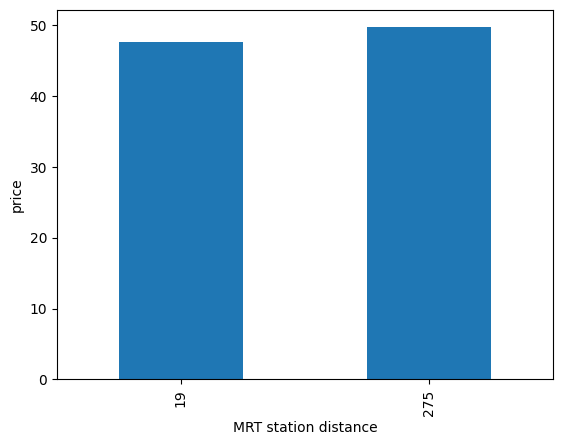

In [136]:
f.plot.bar();
plt.xlabel("MRT station distance")
plt.ylabel("price")

### what is the top 5 most common  convenience stores number?

In [126]:
data['X4 number of convenience stores'].value_counts().head(5)

5    67
0    67
3    46
1    46
6    37
Name: X4 number of convenience stores, dtype: int64

### data count for each feature 

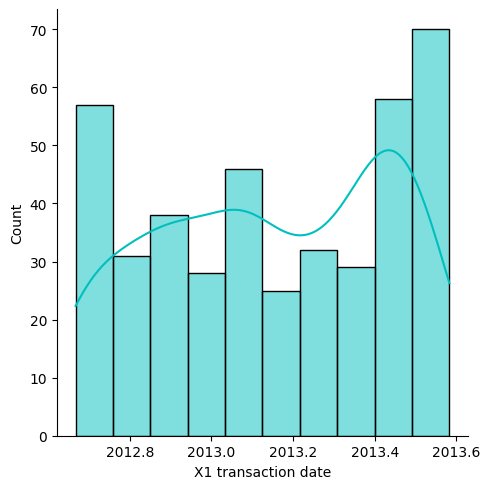

In [142]:
sns.displot(data= data, x='X1 transaction date', kde=True , color='c')

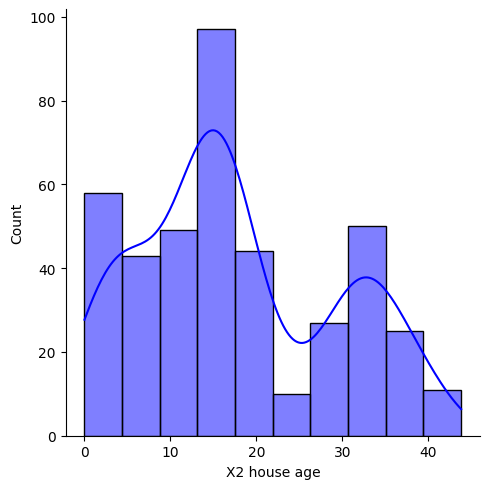

In [145]:
sns.displot(data= data, x='X2 house age', kde=True , color='b')

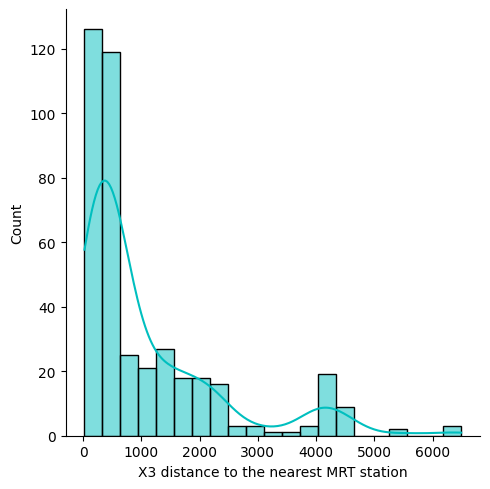

In [146]:
sns.displot(data= data, x='X3 distance to the nearest MRT station', kde=True , color='c')

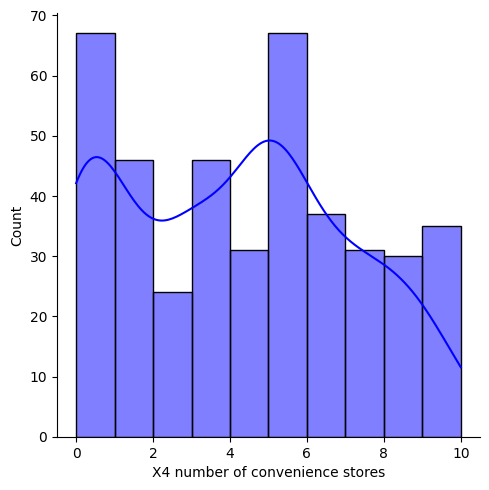

In [149]:
sns.displot(data= data, x='X4 number of convenience stores', kde=True , color='b')

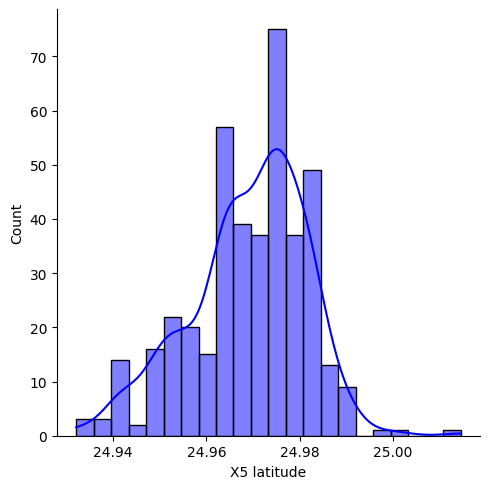

In [150]:
sns.displot(data= data, x='X5 latitude', kde=True , color='b')

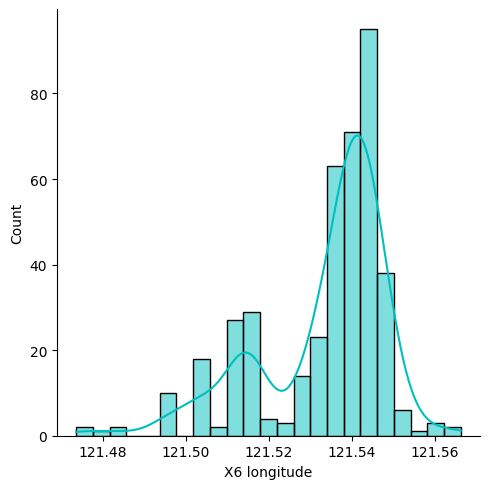

In [148]:
sns.displot(data= data, x='X6 longitude', kde=True , color='c')

## Now lets try to predict the house price depending on the other features that described in the previous EDA 

In [151]:
#drop the date column
data=data.drop('X1 transaction date',axis=1)

In [152]:
data

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381,15.4
410,5.6,90.45606,9,24.97433,121.54310,50.0
411,18.8,390.96960,7,24.97923,121.53986,40.6
412,8.1,104.81010,5,24.96674,121.54067,52.5


In [153]:
#do some preprocessing
trans = StandardScaler()
data = trans.fit_transform(data)
data = pd.DataFrame(data)
data.head()

,0,1,2,3,4,5
0,1.255628,-0.792495,2.007407,1.125430,0.448762,-0.005901
1,0.157086,-0.616612,1.667503,0.912444,0.401139,0.310507
2,-0.387791,-0.414015,0.307885,1.486860,0.688183,0.685782
3,-0.387791,-0.414015,0.307885,1.486860,0.688183,1.237656
4,-1.117223,-0.549997,0.307885,0.834188,0.592937,0.376732


In [166]:
x_features=data.iloc[:,0:5]
y = data[5]

x_train, x_test, y_train, y_test = train_test_split(x_features,y)

In [167]:
x_train.shape

(310, 5)

In [168]:
y_train.shape

(310,)

In [169]:
x_test.shape

(104, 5)

In [170]:
y_test.shape

(104,)

### Training the linear regression model 

In [171]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

In [172]:
y_pred = lr_model.predict(x_test)
y_pred.shape, y_test.shape

((104,), (104,))

In [180]:
print ('MAE: %f' % mean_absolute_error(y_test, y_pred))
print ('MSE: %f' % mean_squared_error(y_test, y_pred))
print ('RMSE: %f' % np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 0.448080
MSE: 0.323092
RMSE: 0.568412


<AxesSubplot: xlabel='5'>

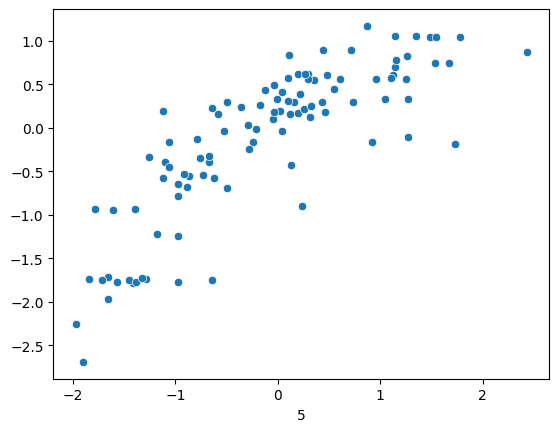

In [181]:
sns.scatterplot(x=y_test, y=y_pred)